In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Check how many rows and columns are there and how many nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [17]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [18]:
#Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Scaling the data with Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#Using one of the 'Classification'
LoR = LogisticRegression()
LoR.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
#Making predictions with model
y_pred = LoR.predict(X_test_scaled)

In [23]:
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy of the Model: ", acc)
print("Confusion Matrix of the Model: ")
print(conf_matrix)
print("Precision of the Model: ", precision)
print("Recall of the Model: ", recall)
print("F1 Score of the Model: ", f1)

Accuracy of the Model:  0.7532467532467533
Confusion Matrix of the Model: 
[[79 20]
 [18 37]]
Precision of the Model:  0.6491228070175439
Recall of the Model:  0.6727272727272727
F1 Score of the Model:  0.6607142857142857


In [24]:
!pip install shap

In [25]:
import shap
import matplotlib.pyplot as plt

In [26]:
#Giving explaination to Logistic Regression model
LoR_explainer = shap.LinearExplainer(LoR, X_train_scaled)
LoR_shap_values = LoR_explainer.shap_values(X_test_scaled)

In [27]:
print(LoR_shap_values)

[[ 0.1816994  -0.85546252  0.15568271 ...  0.27004845  0.00446075
   0.43864826]
 [-0.07511954 -0.38689932 -0.07208029 ...  0.44109256 -0.18877009
  -0.36755573]
 [-0.07511954 -0.52077452  0.07529577 ... -0.05191692 -0.18191794
  -0.36755573]
 ...
 [ 0.31010886 -0.95586892 -0.03188682 ...  0.55176815  0.04214762
   0.95168716]
 [-0.07511954  0.75103986 -0.00509117 ... -0.33363661 -0.05926431
  -0.07439064]
 [ 0.31010886 -1.65871371 -0.00509117 ...  0.40084688  0.19289509
   0.29206572]]


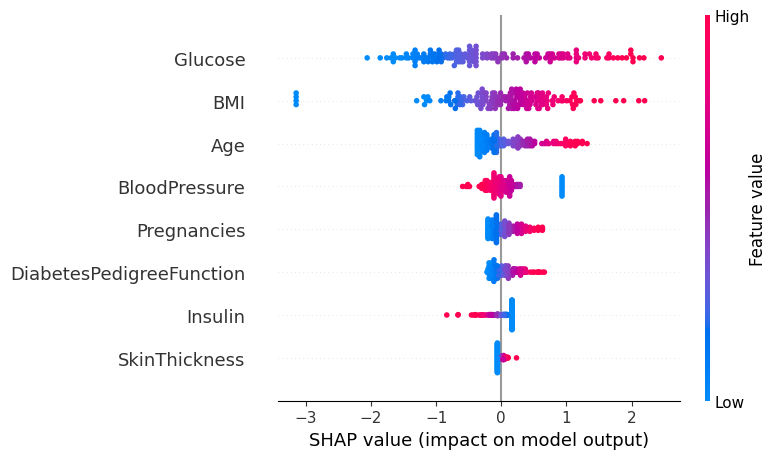

In [30]:
shap.summary_plot(LoR_shap_values, X_test_scaled, feature_names=X.columns)